In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/Desharnais.csv")


In [3]:
dataset.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [4]:

max_corr_features =  [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']


x=np.array(dataset[max_corr_features])

y=np.array(dataset['Effort'])

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(81,1))
y=scaler.fit_transform(y)

In [6]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=35) 

In [7]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0)
regr.fit(X_train,y_train.ravel())
y_pred=regr.predict(X_test)
 

In [8]:
y_pred=np.reshape(y_pred,(17,1))
y_test=np.reshape(y_test,(17,1))

In [9]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [10]:
y_pred

array([[0.08467983],
       [0.09659769],
       [0.14543853],
       [0.10309606],
       [0.07452528],
       [0.10791447],
       [0.82704967],
       [0.22982972],
       [0.16469213],
       [0.10309606],
       [0.09659769],
       [0.10517654],
       [0.48237084],
       [0.32899977],
       [0.1082822 ],
       [0.09080106],
       [0.10791447]])

In [11]:
y_test

array([[0.15499701],
       [0.07630162],
       [0.22351885],
       [0.11071215],
       [0.01286655],
       [0.14781568],
       [0.07719928],
       [0.15948534],
       [0.12507481],
       [0.10442849],
       [0.03081987],
       [0.19688809],
       [0.22800718],
       [0.17414722],
       [0.07390784],
       [0.0855775 ],
       [0.14392579]])

In [12]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [13]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.04056610240076676

RMSE:
 0.20141028375126915

MAPE:
 129.79334270699977

SMAPE:
 53.17

 Adj R2 score:
 0.9051095261639239


In [14]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [15]:
y_test=np.reshape(y_test,(17,))
y_pred=np.reshape(y_pred,(17,))

In [16]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0          4172.0       2527.000000
1          2331.0       2805.806452
2          5775.0       3948.388889
3          3136.0       2957.829268
4           847.0       2289.444444
5          4004.0       3070.551020
6          2352.0      19894.000000
7          4277.0       5922.636364
8          3472.0       4398.807692
9          2989.0       2957.829268
10         1267.0       2805.806452
11         5152.0       3006.500000
12         5880.0      11830.583333
13         4620.0       8242.620690
14         2275.0       3079.153846
15         2548.0       2670.200000
16         3913.0       3070.551020


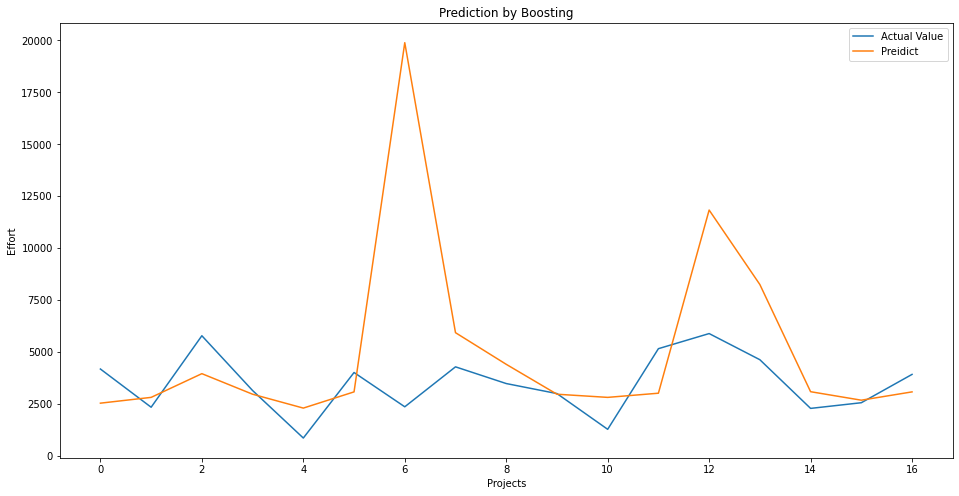

In [17]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Boosting")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()